In [29]:
from hyperopt import fmin,tpe, hp
from sklearn.model_selection import cross_val_score

best = fmin(
    fn=lambda x:x,
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,# 指定搜索算法 tpe表示 tree of Parzen estimators
    max_evals=100
)

print(best)

100%|██████████| 100/100 [00:00<00:00, 204.63trial/s, best loss: 0.0009655981695987428]
{'x': 0.0009655981695987428}


In [7]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', -2, 2),
    algo=tpe.suggest,
    max_evals=100
)

print(best)


100%|██████████| 100/100 [00:00<00:00, 473.84trial/s, best loss: 8.672555194184996e-06]
{'x': 1.0029449202356235}


In [8]:
'''
hp.choice(label, options) 其中options应是 python 列表或元组。
hp.normal(label, mu, sigma) 其中mu和sigma分别是均值和标准差。
hp.uniform(label, low, high) 其中low和high是范围的下限和上限。
'''
import hyperopt.pyll.stochastic

space = {
    'x': hp.uniform('x', 0, 1),
    'y': hp.normal('y', 0, 1),
    'name': hp.choice('name',['alice', 'bob']),
}

print(hyperopt.pyll.stochastic.sample(space))

{'name': 'bob', 'x': 0.5185000320431359, 'y': -0.1658264098102832}


In [9]:
# 通过trials捕捉信息

from hyperopt import fmin,tpe, hp,STATUS_OK, Trials

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val,'status': STATUS_OK}

trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=50, trials=trials)

print('best', best)


100%|██████████| 50/50 [00:00<00:00, 588.02trial/s, best loss: 0.005066381554272706]
best {'x': -0.07117851891036162}


In [10]:
print( 'trials:')
for trial in trials.trials[:2]:
    print(trial)

trials:
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 6.876710655541666, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [2.622348309348258]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 7, 10, 55, 26, 43000), 'refresh_time': datetime.datetime(2020, 12, 7, 10, 55, 26, 43000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 5.862495537390792, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [-2.4212590810135937]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 7, 10, 55, 26, 44000), 'refresh_time': datetime.datetime(2020, 12, 7, 10, 55, 26, 44000)}


Text(0, 0.5, '$x$')

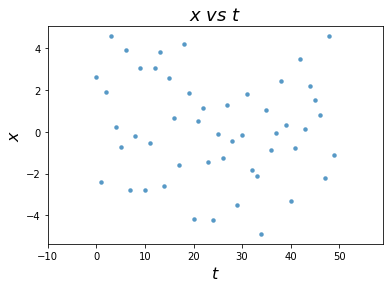

In [15]:
import matplotlib.pyplot as plt

ax = plt.subplot()
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$',fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

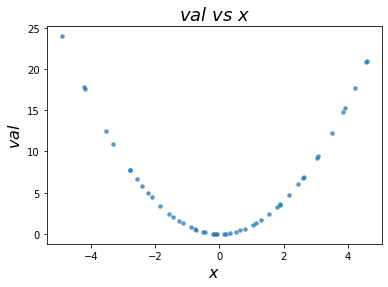

In [16]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)


In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [27]:
import seaborn as sns
import pandas as pd
# sns.set(style="whitegrid", palette="husl")
#
# iris = sns.load_dataset("iris")
# print(iris.head())
#
# iris = pd.melt(iris, "species", var_name="measurement")
# print(iris.head())
#
# f, ax = plt.subplots(1, figsize=(15,10))
# sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [30]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc,'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100,trials=trials)

print("best")
print(best)

100%|██████████| 100/100 [00:03<00:00, 32.56trial/s, best loss: -0.9800000000000001]
best
{'n_neighbors': 10}


Text(0, 0.5, 'cross validation accuracy')

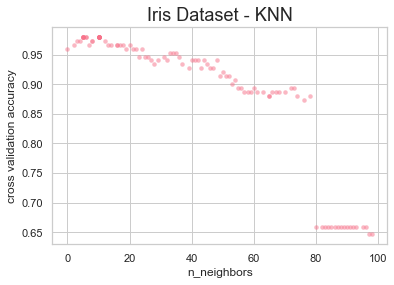

In [32]:
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

In [42]:

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc,'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100,trials=trials)

print("best")
print(best)

100%|██████████| 100/100 [00:02<00:00, 37.41trial/s, best loss: -0.9800000000000001]
best
{'n_neighbors': 5}


Text(0, 0.5, 'cross validation accuracy')

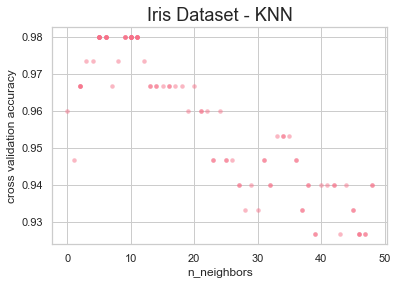

In [43]:
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)
